# Основы визуализации данных с помощью Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык визуализации данных с помощью простых графиков matplotlib. Научиться использовать визуализацию данных для проверки гипотез и валидации данных.

### Описание домашнего задания и формат сдачи

Вам предстоит выполнить задачи по визуализации данных. Для этого  впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку преподавателю.

**Важно учесть:** У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` – порядковый номер записи в датасете
* `Name` – наименование игры
* `Platform` – платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` – год выпуска игры
* `Genre` – жанр игры
* `Publisher` – наименование компании-издателя игры
* `NA_Sales` – объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` – объем продаж игры в Европе, млн. копий
* `JP_Sales` – объем продаж игры в Японии, млн. копий
* `Other_Sales` – объем продаж игры в остальных странах, млн. копий
* `Global_Sales` – объем продаж игры по всему миру, млн. копий

### Критерии оценки

**Зачет** – выполнены задачи 1-9, каждый график отформатирован и читаем

**На доработку** – выполнены не все обязательные задачи или какой-либо из графиков не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, необходимые для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте гистограмму распределения объема продаж всех игр в Японии.

([<matplotlib.axis.XTick at 0x21583054ca0>,
 [Text(0.0, 0, '0.00'),
  Text(1.022, 0, '1.02'),
  Text(2.044, 0, '2.04'),
  Text(3.066, 0, '3.07'),
  Text(4.088, 0, '4.09'),
  Text(5.11, 0, '5.11'),
  Text(6.132, 0, '6.13'),
  Text(7.154, 0, '7.15'),
  Text(8.176, 0, '8.18'),
  Text(9.198, 0, '9.20'),
  Text(10.22, 0, '10.22')])

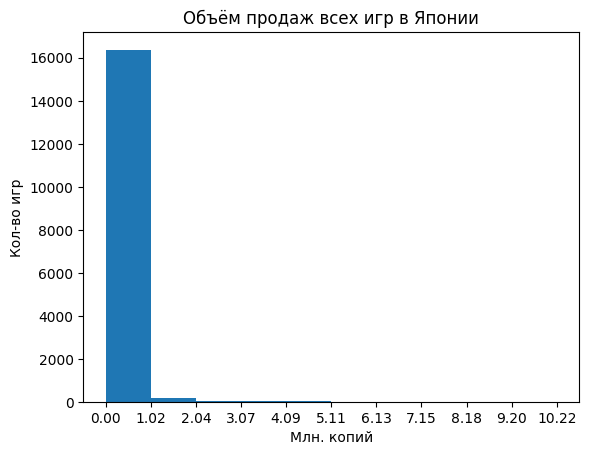

In [3]:
serie = df["JP_Sales"]
plt.hist(serie)
plt.title("Объём продаж всех игр в Японии")
plt.xlabel("Млн. копий")
plt.ylabel("Кол-во игр")

bin_width = serie.max() / 10
x_range = [i*bin_width for i in range(11)]

plt.xticks(x_range)

### Задача 2

Постройте столбчатую диаграмму (barchart), показывающую сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах.

In [4]:
df2= df[df["Name"] == "Grand Theft Auto V"].groupby("Platform")["Global_Sales"].sum()

Text(0, 0.5, 'Млн. копий')

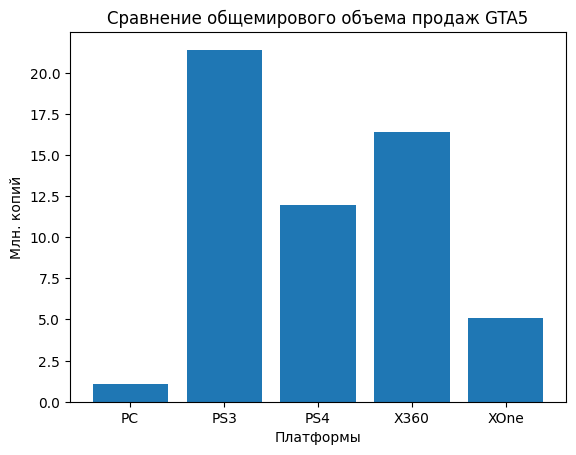

In [5]:
plt.bar(df2.index, df2.values)
plt.title("Сравнение общемирового объема продаж GTA5")
plt.xlabel("Платформы")
plt.ylabel("Млн. копий")

### Задача 3

Постройте линейный график динамики суммарных общемировых продаж всех игр по годам.

In [6]:
serie = df.groupby("Year")["Global_Sales"].sum()

Text(0, 0.5, 'Млн. копий')

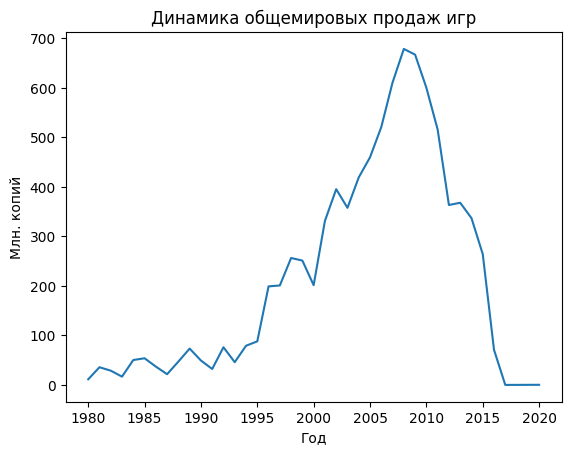

In [7]:
plt.plot(serie)
plt.title("Динамика общемировых продаж игр")
plt.xlabel("Год")
plt.ylabel("Млн. копий")

### Задача 4

Постройте точечную диаграмму, показывающую существование зависимости продаж во всем мире от продаж в Северной Америке.

Text(0.5, 0, 'Северная Америка(млн. копий)')

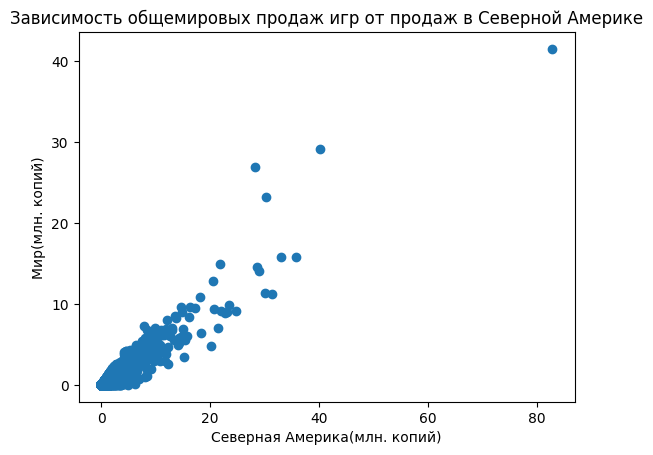

In [8]:
plt.scatter(df['Global_Sales'], df['NA_Sales'])
plt.title("Зависимость общемировых продаж игр от продаж в Северной Америке")
plt.ylabel("Мир(млн. копий)")
plt.xlabel("Северная Америка(млн. копий)")

### Задача 5

Постройте круговую диаграмму процентного соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире. Подпишите доли графика с точностью 1 знак после запятой.

In [9]:
serie = df[df["Name"] == "Super Mario Bros."].groupby("Platform")["Global_Sales"].sum()

Text(0.5, 1.0, 'Соотношение общемировых продаж игры Mario на платформах')

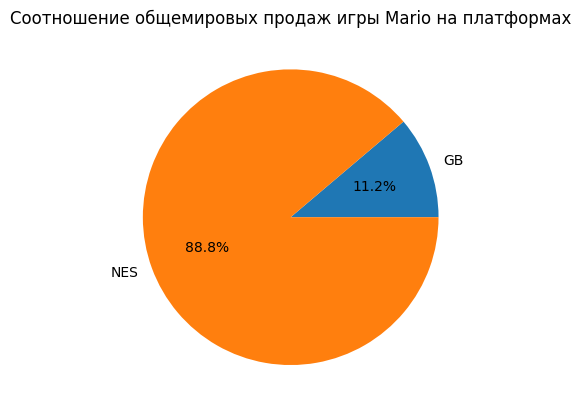

In [10]:
plt.pie(serie, labels=serie.index, autopct = '%1.1f%%')
plt.title("Соотношение общемировых продаж игры Mario на платформах")

### Задача 6

Определите 5 издателей, имеющих наибольшие суммарные продажи во всём мире в 2013 году, и проиллюстрируйте величину их продаж на столбчатой диаграмме.

In [11]:
serie = df[df["Year"] == 2013.0].groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False)[:5]

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Nintendo'),
  Text(2, 0, 'Take-Two Interactive'),
  Text(3, 0, 'Activision'),
  Text(4, 0, 'Ubisoft')])

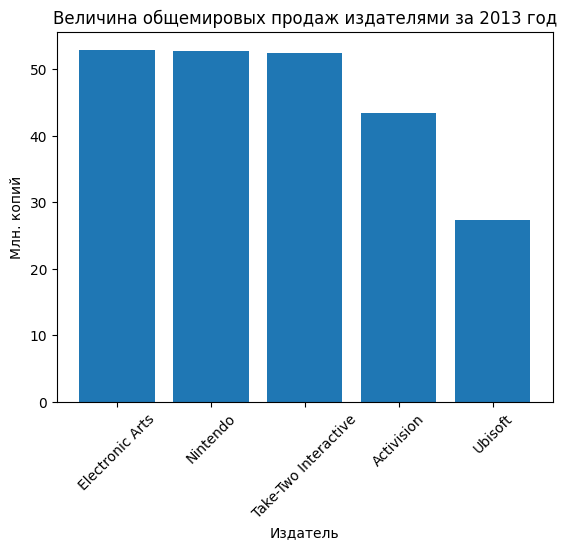

In [12]:
plt.bar(serie.index, serie.values)
plt.title("Величина общемировых продаж издателями за 2013 год")
plt.xlabel("Издатель")
plt.ylabel("Млн. копий")
plt.xticks(rotation=45)

### Задача 7

Постройте гистограмму распределения величины общемировых продаж игр, выпущенных не издателем Nintendo, в период с 2000 по 2015 год включительно. Гистограмма для большей точности должна содержать 20 столбцов, отсечки на оси X должны соответствовать границам столбцов.


In [13]:
serie = df[df["Publisher"] != "Nintendo"][(df["Year"] >= 2000.0) | (df["Year"] <= 2015.0)]["Global_Sales"]

C:\Users\Yasha\AppData\Local\Temp\ipykernel_5192\2785953901.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  serie = df[df["Publisher"] != "Nintendo"][(df["Year"] >= 2000.0) | (df["Year"] <= 2015.0)]["Global_Sales"]


Text(0, 0.5, 'Кол-вл игр')

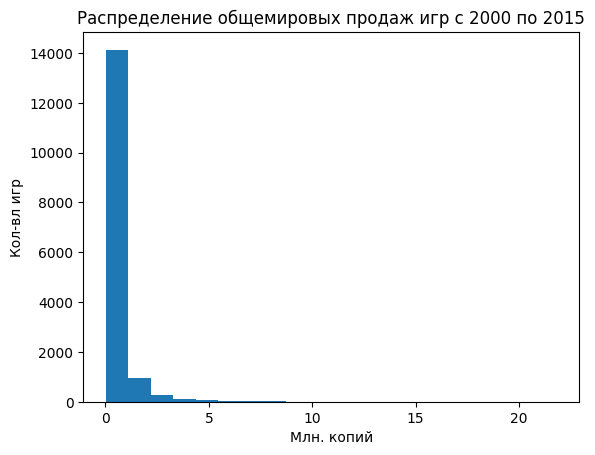

In [15]:
plt.hist(serie, bins=20)
plt.title("Распределение общемировых продаж игр с 2000 по 2015")
plt.xlabel("Млн. копий")
plt.ylabel("Кол-вл игр")

### Задача 8

Постройте линейный график динамики суммарных мировых продаж игр жанра "Action" по годам.

In [19]:
serie = df[df["Genre"] == "Action"].groupby("Year")["Global_Sales"].sum()

Text(0, 0.5, 'Млн. копий')

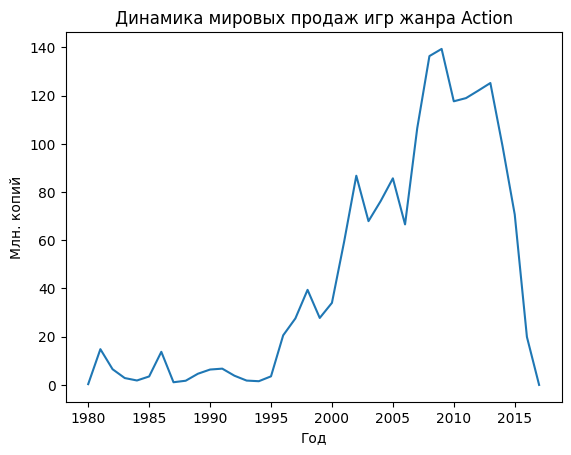

In [21]:
plt.plot(serie)
plt.title("Динамика мировых продаж игр жанра Action")
plt.xlabel("Год")
plt.ylabel("Млн. копий")

### Задача 9

С помощью столбчатой диаграммы проиллюстрируйте объем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке за все время в зависимости от жанра. Столбцы расположите по убыванию.

In [29]:
serie = df[df["Publisher"] == "Microsoft Game Studios"].groupby("Genre")["NA_Sales"].sum().sort_values(ascending=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Shooter'),
  Text(1, 0, 'Misc'),
  Text(2, 0, 'Racing'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Sports'),
  Text(5, 0, 'Action'),
  Text(6, 0, 'Simulation'),
  Text(7, 0, 'Strategy'),
  Text(8, 0, 'Fighting'),
  Text(9, 0, 'Adventure'),
  Text(10, 0, 'Platform'),
  Text(11, 0, 'Puzzle')])

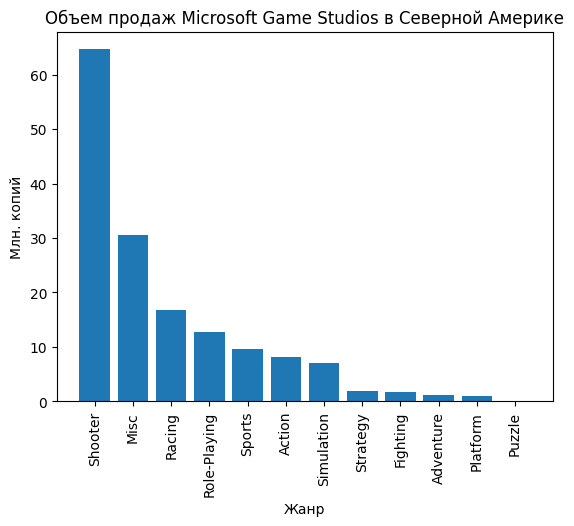

In [30]:
plt.bar(serie.index, serie.values)
plt.title("Объем продаж Microsoft Game Studios в Северной Америке")
plt.xlabel("Жанр")
plt.ylabel("Млн. копий")
plt.xticks(rotation=90)

## Дополнительные (необязательные) задачи

### Задача 10

Одной из основных задач при анализе данных является проверка данных на корректность и отсутствие ошибок. В датасете "vgsales" одним из потенциальных источников ошибок является столбец с общемировыми продажами. По идее, значение общемировых продаж какой-либо игры должно равняться сумме продаж в Северной Америке, Европе, Японии и остальных странах, в противном случае мы получим ошибку в данных, которая может негативно повлиять на весь дальнейший процесс анализа.

Причин возникновения такой ошибки может быть несколько. Давайте рассмотрим следующие причины:
1. Ошибка округления. В целом, такая ошибка достаточно часто встречается при переводе величин из одних единиц в другие (например, из тысяч копий в миллионы копий).
1. Ошибка вычислений. Такая ситуация требует более серьезного исследования, поскольку она может привести к недостоверным результатам анализа данных.

Будем считать, что в записи имеется ошибка суммирования, если сумма продаж какой-либо игры в Северной Америке, Европе, Японии и остальных странах отличается от общемировых продаж более, чем на 0.01 млн копий.

С помощью круговой диаграммы проиллюстрируйте процент записей в датасете, имеющих такую ошибку суммирования продаж.

In [58]:
df["Global_math"] = df["Global_Sales"] - df["EU_Sales"] - df["NA_Sales"] - df["JP_Sales"] - df["Other_Sales"]


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Global_math
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,-3.552714e-15
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,5.773160e-15
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,-1.000000e-02
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2.220446e-15
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,-1.000000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.000000e+00
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.000000e+00
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,1.000000e-02
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.000000e+00


(-1.099999997301973,
 1.0999999996471448,
 -1.0999997662832122,
 1.0999997619164716)

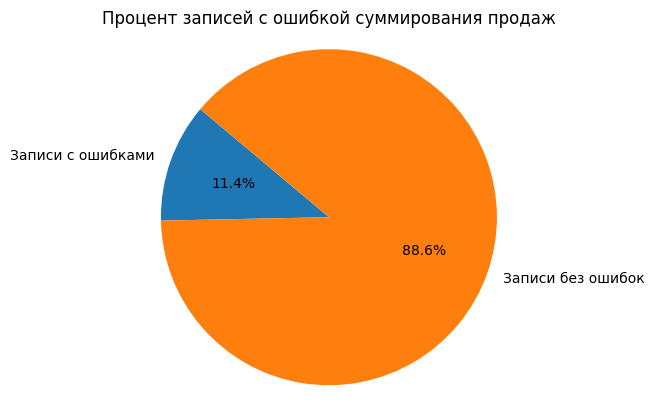

In [66]:
error_sales = df[abs(df['Global_math']) > 0.01]
error_percentage = (len(error_sales) / len(df)) * 100

labels = ['Записи с ошибками', 'Записи без ошибок']
sizes = [error_percentage, 100 - error_percentage]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Процент записей с ошибкой суммирования продаж')
plt.axis('equal')